In [1]:
import os
import sys
sys.path.append('../pyWholeBrain')
import numpy as np
import colorsys
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from hdf5manager import hdf5manager as h5
import timecourseAnalysis as tca
import wholeBrain as wb

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


170721_07
Magnitude means shape:  (17999,)
dfof shape:  (5998,)


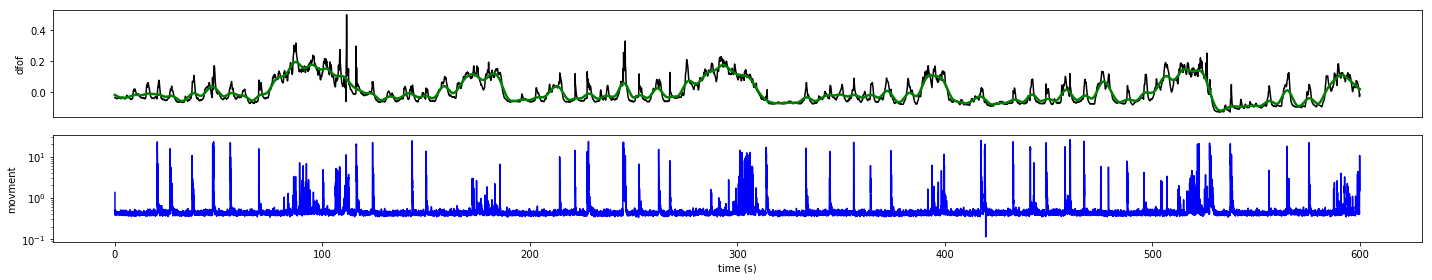

171107_01
Magnitude means shape:  (17999,)
dfof shape:  (5998,)


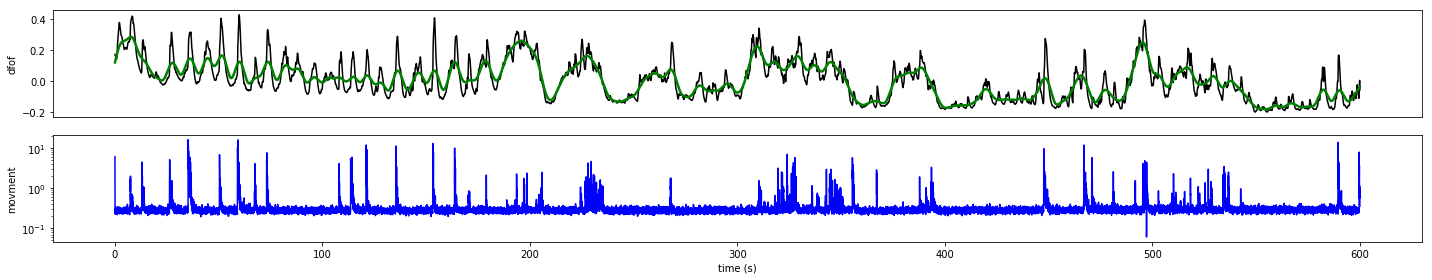

180919_01
Target was not valid: mags
'mags'
180919_07
Target was not valid: mags
'mags'


In [34]:
path = '/home/brian/Documents/data/testData/state_data/'
exp_list = ['170721_07', '171107_01', '180919_01', '180919_07'] #180919 are 15 min bod recordings, 10 min brain.  Take the first 10 min only.
'''
Need to re-run the 180919_01 on the bigger computer.
'''

for exp in exp_list:
    print(exp)     
    #set paths
    videofile = path + exp + '_videodata.hdf5'
    offile = path + exp + '_c1_gridOpticFlow.hdf5'
    
    try:
        #load mags
        f = h5(offile)
        mags = f.load('mags')
        magmean = np.nanmean(mags, axis = 1)
        print('Magnitude means shape: ', magmean.shape)

        g = h5(videofile)
        dfof = g.load('dfof_mean')
        print('dfof shape: ', dfof.shape)
        
        sdfof = tca.smooth(dfof, 100, 'han')
        
        framerate = np.around(magmean.shape[0]/dfof.shape[0]) * 10
        if framerate > 30: framerate = 30
            
        time = np.arange(dfof.shape[0])/10
        time2 = np.arange(magmean.shape[0])/framerate
        
        fig = plt.figure(figsize = (20,4))
        
        ax1 = plt.subplot(211)
        ax1.plot(time, dfof, color = 'k')
        ax1.plot(time, sdfof, color = 'g', linewidth = 2.5)

        ax1.set_xticks([])
        ax1.set_ylabel('dfof')

        ax2 = plt.subplot(212)
        ax2.semilogy(time2, magmean, color='b')
        ax2.set_ylabel('movment')
        ax2.set_xlabel('time (s)')

        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(e)